In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TensorNetwork import TensorNetwork as TN
from QFTMPO import QFTMPO
from prepare_network import *

# Entangled States Preperation

### Entangling layers applied up to given depth

In [2]:
mps, t = prepare_entangled_state(8, depth=3)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 5.837 ms
Bond-dims: (2, 4, 8, 16, 8, 4, 2)


In [3]:
mps, t = prepare_entangled_state(8, depth=300)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 120.621 ms
Bond-dims: (2, 4, 8, 16, 8, 4, 2)


In [4]:
mps, t = prepare_entangled_state(12, depth=3)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 31.746 ms
Bond-dims: (2, 4, 8, 16, 32, 64, 32, 16, 8, 4, 2)


In [5]:
mps, t = prepare_entangled_state(12, depth=300)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 1875.137 ms
Bond-dims: (2, 4, 8, 16, 32, 64, 32, 16, 8, 4, 2)


### Absolutely Maximally Entangled (AME) State
DOI: 10.1103/PhysRevA.100.022342

In [6]:
mps, t = prepare_AME_state(8)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 3.480 ms
Bond-dims: (2, 4, 8, 8, 8, 4, 2)


In [7]:
mps, t = prepare_AME_state(12)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 2.700 ms
Bond-dims: (2, 4, 8, 8, 8, 8, 8, 8, 8, 4, 2)


# QFT: Gate Ansatz vs MPO Ansatz (without limitations)

### States preperation:

In [8]:
N = (4, 6, 8, 10, 12, 14, 16)
states = [prepare_entangled_state(N=n)[0] for n in N]

### Gate Ansatz:

In [9]:
gate_times = []
gate_result_states = []
for mps0 in states:
    mps, t = qft_with_gates(mps0, max_bond=None)
    gate_times.append(t)
    gate_result_states.append(mps)
    print(t)
    
print(gate_times)

1.349
3.3379999999999996
7.528
36.842
384.394
2765.948
23116.176
[1.349, 3.3379999999999996, 7.528, 36.842, 384.394, 2765.948, 23116.176]


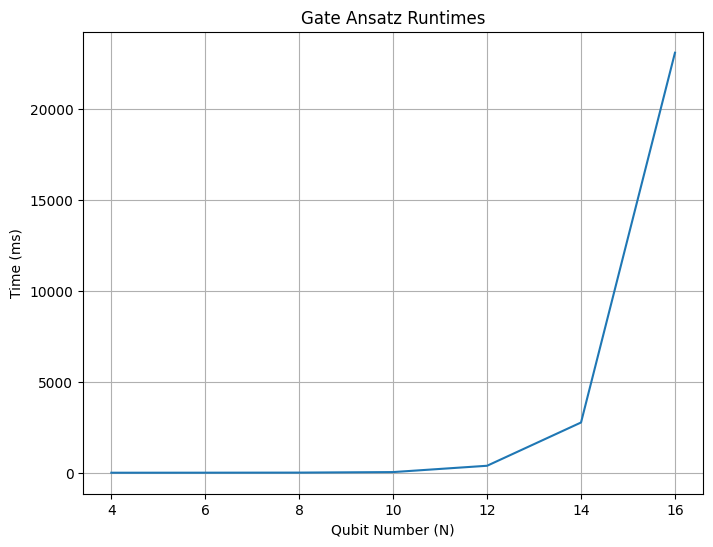

In [10]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("Gate Ansatz Runtimes")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Time (ms)")

plt.plot(N, gate_times)
plt.show()

[4, 8, 16, 32, 64, 128, 256]


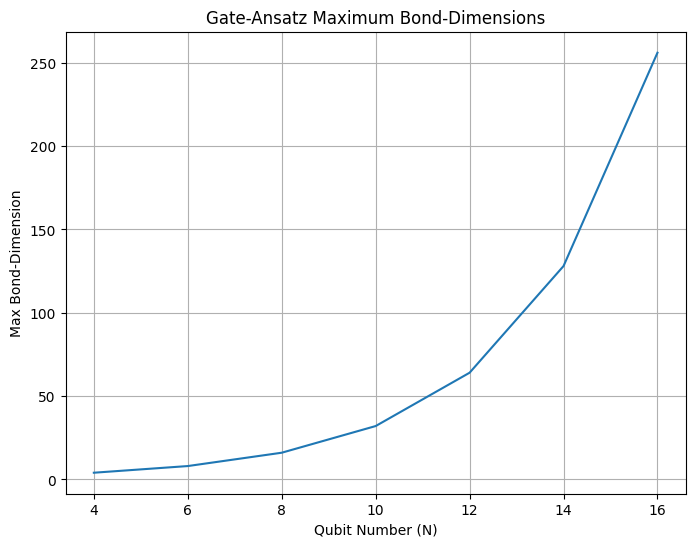

In [11]:
max_dims = [max(mps.get_bond_dims()) for mps in gate_result_states]
print(max_dims)

plt.figure(figsize=(8, 6))
plt.grid()

plt.title("Gate-Ansatz Maximum Bond-Dimensions")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Max Bond-Dimension")

plt.plot(N, max_dims)
plt.show()

### QFT-MPO Ansatz:

In [12]:
mpo_times = []
mpo_result_states = []
for mps0 in states[:5]:
    mps, t = qft_with_mpo(mps0, max_bond=None)
    mpo_times.append(t)
    mpo_result_states.append(mps)
    print(t)
    
print(mpo_times)

0.959
4.1419999999999995
95.646
2108.199
77335.109
[0.959, 4.1419999999999995, 95.646, 2108.199, 77335.109]


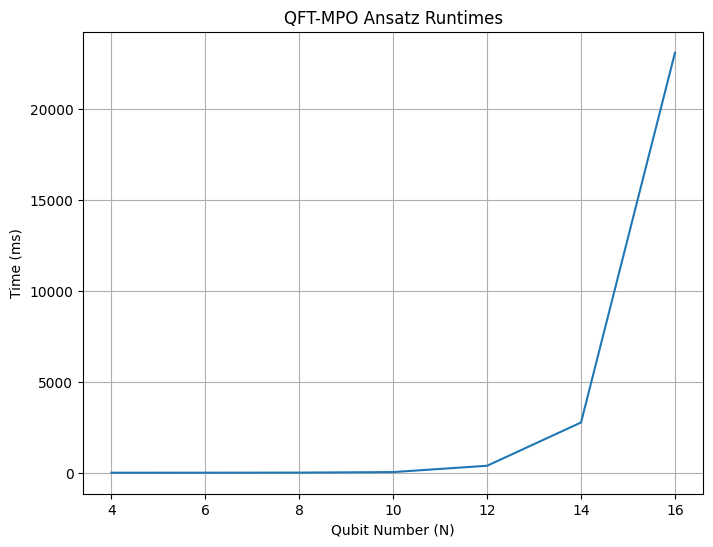

In [13]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO Ansatz Runtimes")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Time (ms)")

plt.plot(N, gate_times)
plt.show()

[8, 16, 64, 128, 512]


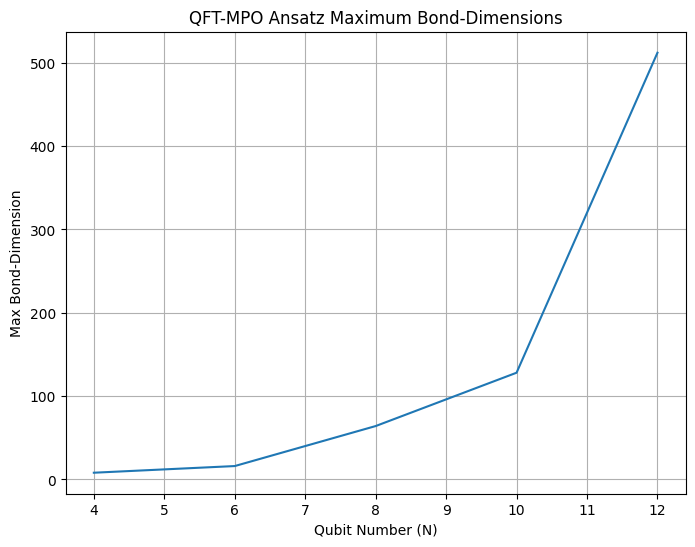

In [14]:
max_dims = [max(mps.get_bond_dims()) for mps in mpo_result_states]
print(max_dims)

plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO Ansatz Maximum Bond-Dimensions")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Max Bond-Dimension")

plt.plot(N[:len(max_dims)], max_dims)
plt.show()

### Comparison:

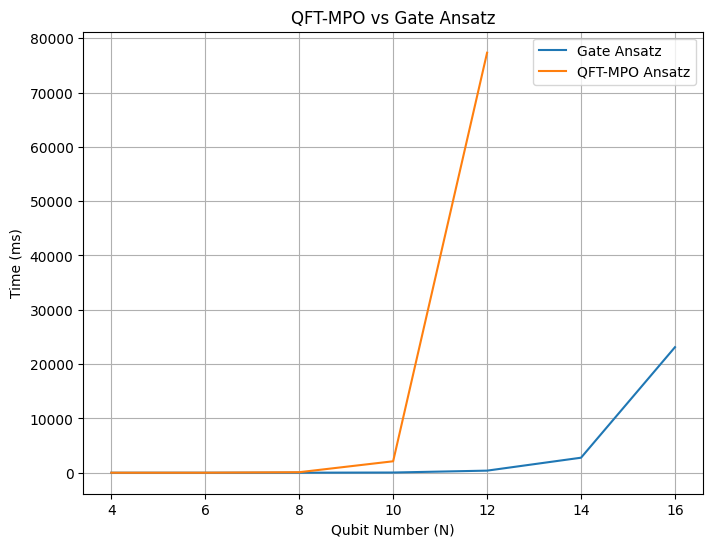

In [15]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO vs Gate Ansatz")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Time (ms)")

plt.plot(N, gate_times, label="Gate Ansatz")
plt.plot(N[:len(mpo_times)], mpo_times, label="QFT-MPO Ansatz")

plt.legend()
plt.show()

# QFT: Gate Ansatz vs MPO Ansatz (with bounded Bond-Dimensions)

In [26]:
max_dims = (1, 2, 4, 8, 16, 32, 64, 128, 256)

In [27]:
gate_times_N = []
gate_result_states_N = []

for mps0 in states:
    gate_times = []
    gate_result_states = []
    
    for bond in max_dims:
        mps, t = qft_with_gates(mps0, max_bond=bond)
        gate_times.append(t)
        gate_result_states.append(mps)
    
    gate_times_N.append(gate_times)
    gate_result_states_N.append(gate_result_states)
    print(f"N={len(mps0)}: {gate_times}")

N=4: [1.608, 1.887, 1.1800000000000002, 0.778, 0.623, 0.523, 0.5109999999999999, 0.5379999999999999, 0.517]
N=6: [2.3, 1.936, 1.934, 1.957, 1.9400000000000002, 1.842, 1.81, 1.9729999999999999, 2.189]
N=8: [3.8040000000000003, 3.621, 4.527, 5.8180000000000005, 5.928, 5.5840000000000005, 5.579, 5.868, 5.963]
N=10: [11.852, 5.831, 7.621, 11.888, 23.362000000000002, 27.838, 28.095, 28.532, 28.84]
N=12: [9.225000000000001, 9.899, 12.799, 22.599, 59.402, 347.117, 530.241, 324.84499999999997, 314.452]
N=14: [18.816, 34.98, 36.335, 48.559, 141.528, 645.7420000000001, 2433.761, 2930.2690000000002, 3299.35]
N=16: [38.830000000000005, 37.892, 45.202, 88.827, 208.495, 1232.912, 4750.615, 17457.501, 28182.071]


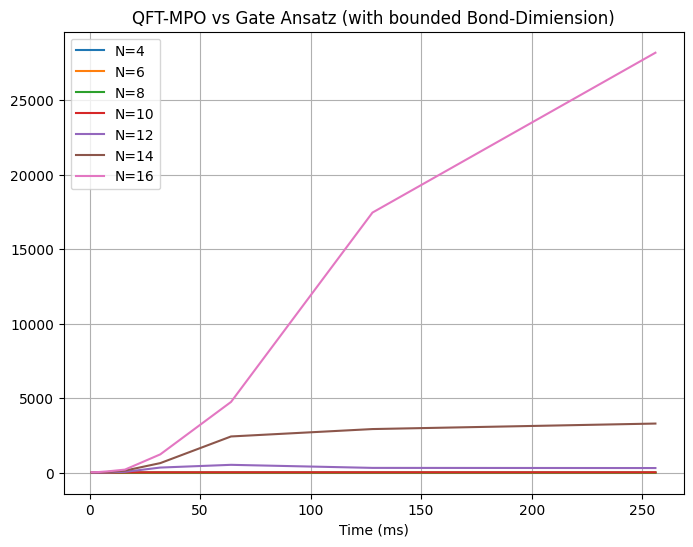

In [38]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO vs Gate Ansatz (with bounded Bond-Dimiension)")
plt.xlabel("Max. Bond-Dimension")
plt.xlabel("Time (ms)")

for n, lst in enumerate(gate_times_N):
    plt.plot(max_dims, lst, label=f"N={N[n]}")

#plt.xlim(right=160)
#plt.ylim(top=15000)

plt.legend()
plt.show()

In [19]:
mpo_times_N = []
mpo_result_states_N = []

for mps0 in states[:4]:
    mpo_times = []
    mpo_result_states = []
    
    for bond in max_dims[:4]:
        mps, t = qft_with_mpo(mps0, max_bond=bond)
        mpo_times.append(t)
        mpo_result_states.append(mps)
    
    mpo_times_N.append(mpo_times)
    mpo_result_states_N.append(mpo_result_states)
    print(f"N={len(mps0)}: {mpo_times}")

N=4: [1.7930000000000001, 0.8099999999999999, 0.92, 0.837]
N=6: [1.524, 1.375, 3.061, 6.198]
N=8: [0.964, 2.376, 19.283, 57.138]
N=10: [5.465, 16.983999999999998, 46.707, 341.48699999999997]


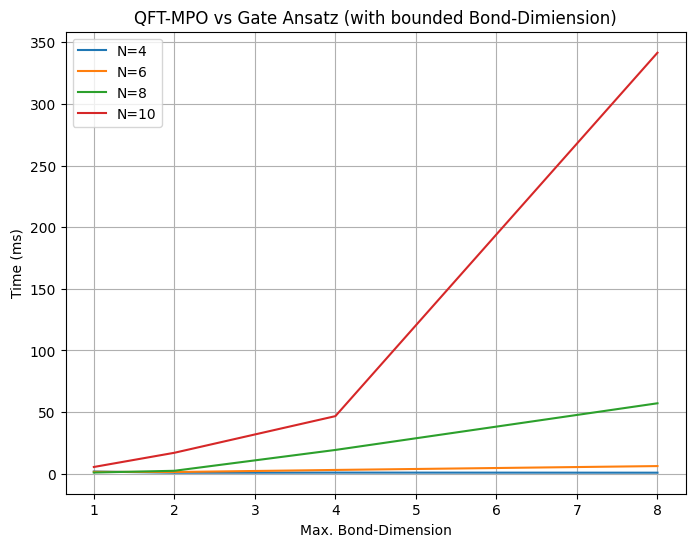

In [22]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO vs Gate Ansatz (with bounded Bond-Dimiension)")
plt.xlabel("Max. Bond-Dimension")
plt.ylabel("Time (ms)")

for n, lst in enumerate(mpo_times_N):
    plt.plot(max_dims[:len(lst)], lst, label=f"N={N[n]}")

plt.legend()
plt.show()